Иванов Кирилл Евгеньевич ИУ5-61Б

pip install pandas scikit-learn matplotlib seaborn

Данные загружены
Форма данных: 150000 строк, 6 столбцов

Проверка пропусков:
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Пропуски в 'Age' заполнены средним значением

Обучение моделей...
Модели обучены

Результаты модели 'Logistic Regression':
Accuracy: 0.4638
F1-score (weighted): 0.5733
Classification report:
              precision    recall  f1-score   support

          No       0.92      0.46      0.61     27623
         Yes       0.08      0.54      0.14      2377

    accuracy                           0.46     30000
   macro avg       0.50      0.50      0.37     30000
weighted avg       0.85      0.46      0.57     30000



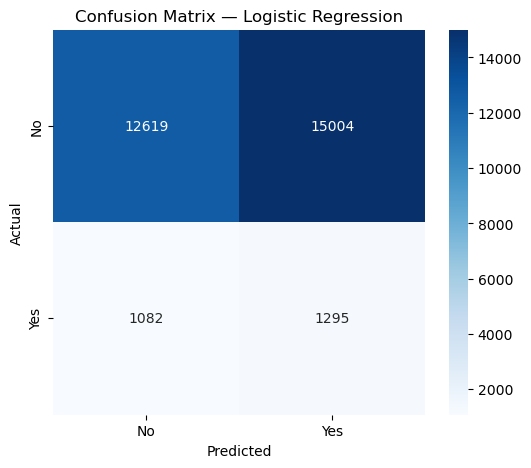


Результаты модели 'Decision Tree':
Accuracy: 0.8553
F1-score (weighted): 0.8550
Classification report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92     27623
         Yes       0.08      0.08      0.08      2377

    accuracy                           0.86     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.85      0.86      0.85     30000



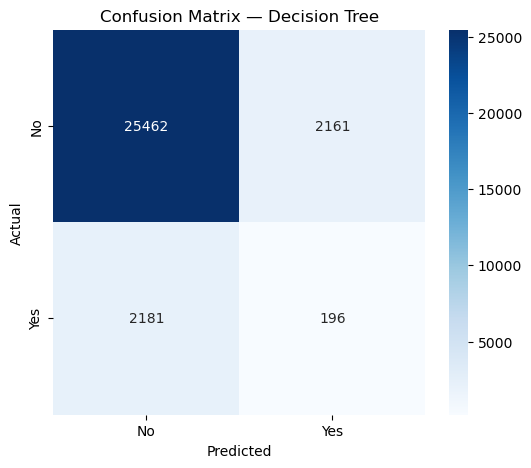


Выводы:
Использованные метрики: Accuracy и F1-score (weighted)
Логистическая регрессия стала лучше предсказывать редкий класс благодаря class_weight='balanced'
Дерево решений показало лучшее качество
Рекомендуется использовать ансамбли и методы oversampling для повышения качества


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('toy_dataset.csv')

print("Данные загружены")
print(f"Форма данных: {df.shape[0]} строк, {df.shape[1]} столбцов")

print("\nПроверка пропусков:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
print("\nПропуски в 'Age' заполнены средним значением")

X = df.drop(columns=['Illness'])
y = df['Illness']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipe_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

print("\nОбучение моделей...")
pipe_logreg.fit(X_train, y_train)
pipe_tree.fit(X_train, y_train)

print("Модели обучены")

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\nРезультаты модели '{name}':")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (weighted): {f1:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix — {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(pipe_logreg, "Logistic Regression")
evaluate_model(pipe_tree, "Decision Tree")

print("\nВыводы:")
print("Использованные метрики: Accuracy и F1-score (weighted)")
print("Логистическая регрессия стала лучше предсказывать редкий класс благодаря class_weight='balanced'")
print("Дерево решений показало лучшее качество")
print("Рекомендуется использовать ансамбли и методы oversampling для повышения качества")